Aligning reads to human genome using Bowtie:


Ran in terminal, using:

data/hg19/hg19 (human genome) as database

data/lab6/illumina_reads.fastq as reads

unaligned.fastq will contain genes from long-diverged Shewanella oneidensis

OUTPUT:
    
    
    1124714 reads; of these:
    1124714 (100.00%) were unpaired; of these:
    1028379 (91.43%) aligned 0 times
    87274 (7.76%) aligned exactly 1 time
    9061 (0.81%) aligned >1 times
    8.57% overall alignment rate

About 8.57% of sequencing library came from human source (contamination)

Aligning reads to Shewanella oneidensis using Bowtie:


Ran in terminal, using:

/data/lab6/shewanella_oneidensis_mr-1 (Shewanella oneidensis genome) as database

cd_unaligned.fastq (from previous step) as reads

unaligned.fastq will contain genes from human (contamination)

OUTPUT: 

     1028379 reads; of these:
     1028379 (100.00%) were unpaired; of these:
     299560 (29.13%) aligned 0 times
     687571 (66.86%) aligned exactly 1 time
     41248 (4.01%) aligned >1 times
     70.87% overall alignment rate

Output using same settings as above, except --very-sensitive:

    1028379 reads; of these:
    1028379 (100.00%) were unpaired; of these:
    298112 (28.99%) aligned 0 times
    688180 (66.92%) aligned exactly 1 time
    42087 (4.09%) aligned >1 times
    71.01% overall alignment rate
    
Alignment rate increased very slightly!

Converted SAM output file (containing library aligned to Shewanella oneidensis genome) to BAM using terminal command:
     
     samtools view cd2_output.sam > cd_output.bam

Then sorted using:

    samtools sort cd_output.bam > cd_output.sorted.bam

Then indexed using:

    samtools index cd_output.sorted.bam
    
And used “depth” to generate a file containing the depth of coverage for every position in the reference genome:

    samtools depth –a cd_output.sorted.bam > pileup0.tab

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
position = []
depth = []
with open('pileup0.tab') as f:
    r = csv.reader(f, delimiter='\t')
    for row in r:
        position.append(int(row[1]))
        depth.append(int(row[2]))
        

In [3]:
max_cov = max(depth)
min_cov = min(depth)
avg_cov = np.mean(depth)

print(max_cov, min_cov, avg_cov)

281 1 37.03933156165406


Max coverage = 281, min coverage = 1, average coverage = 37

Plotting coverage vs. position:

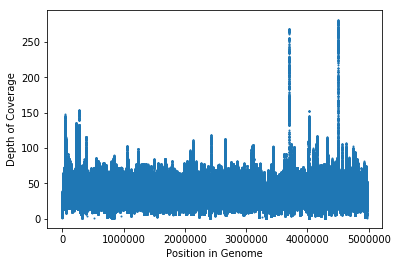

In [4]:
plt.scatter(position, depth, s=(1 ** 2))
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')
plt.show()

Text(0, 0.5, 'Count')

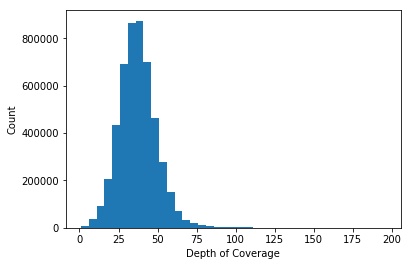

In [5]:
plt.hist(depth, bins=np.arange(1,200, 5))
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')

Extra Credit 1:Generate the same two plots using the SAM file you produced aligning thereadstothe humanreferencegenome.Instead of using “Position in Genome”(the plot onthe left in red, above), plot the average depth (total depth / length of chromosome) for each human chromosome:chr1-22, X, and Y.What biological sexis Jamie?

Converted SAM output file (containing library aligned to Shewanella oneidensis genome) to BAM using terminal command:
     
     samtools view –b cd_output.sam > cd2_output.bam

Then sorted using:

    samtools sort cd2_output.bam > cd2_output.sorted.bam

Then indexed using:

    samtools index cd2_output.sorted.bam
    
And used “depth” to generate a file containing the depth of coverage for every position in the reference genome:

    samtools depth –a cd2_output.sorted.bam > cd_pileup.tab

In [6]:
chromosome_dict = {}
depth = []
with open('cd_pileup.tab') as f:
    r = csv.reader(f, delimiter='\t')
    for row in r:
        if row[0] in chromosome_dict:
            chromosome_dict[row[0]] += [row[2]]
        else:
            chromosome_dict[row[0]] = [row[2]]
        

new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new


In [15]:
depth_dict = {}
for chromosome in chromosome_dict:
    print(chromosome)
    total = 0
    for item in chromosome_dict[chromosome]:
        total += int(item)
    avg_depth = total/len(chromosome_dict[chromosome])
    depth_dict[chromosome] = avg_depth
    print(avg_depth)

chr1
0.009119010379516767
chr2
0.009903796092434827
chr3
0.009936162282222272
chr4
0.00991051332798854
chr5
0.009928095617804712
chr6
0.009895703690429553
chr7
0.009852596285793856
chr8
0.009859157874193974
chr9
0.00854519992506945
chr10
0.009767783017295188
chr11
0.009821725938028058
chr12
0.00983894176470195
chr13
0.008399505294257583
chr14
0.008298740730514542
chr15
0.008051348800570268
chr16
0.008822092624169976
chr17
0.00969688975494983
chr18
0.009668309518286301
chr19
0.009483927704286745
chr20
0.009507862846669095
chr21
0.007291871299532234
chr22
0.006868238589134542
chrX
0.009715041924238568
chrY
0.00411780892527156
chr1_gl000191_random
0.005637349318350512
chr1_gl000192_random
0.0016438476262840276
chr4_gl000193_random
0.0009958427516874003
chr4_gl000194_random
0.001566833273271391
chr9_gl000199_random
0.002754983105124975
chr9_gl000200_random
0.003207955730210923
chr9_gl000201_random
0.016598428682084762
chr11_gl000202_random
0.007480737101962447
chrUn_gl000213
0.001826606348

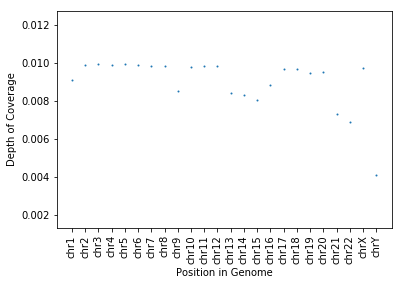

In [21]:
keys = list(depth_dict.keys())
vals = list(depth_dict.values())

plt.scatter(keys[0:24], vals[0:24], s=(1 ** 2))
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')
plt.xticks(rotation=90)
plt.show()

Jaime is a girl! She has very few reads mapped to the Y chromosome, which may be erroneous.